In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
df_titanic = sns.load_dataset("titanic")



In [75]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Analyse der Überlebenden der Titanic-Tragödie


In [76]:
df_pclass_survived = df_titanic.groupby(["pclass"])["survived"].mean()*100
df_fare_survived = df_titanic.groupby(["fare"])["survived"].mean()*100


In [77]:
df_pclass = df_titanic.groupby("pclass").agg({"survived": "mean", "fare": "mean"}).reset_index()
df_pclass

,pclass,survived,fare
0,1,0.629630,84.154687
1,2,0.472826,20.662183
2,3,0.242363,13.675550


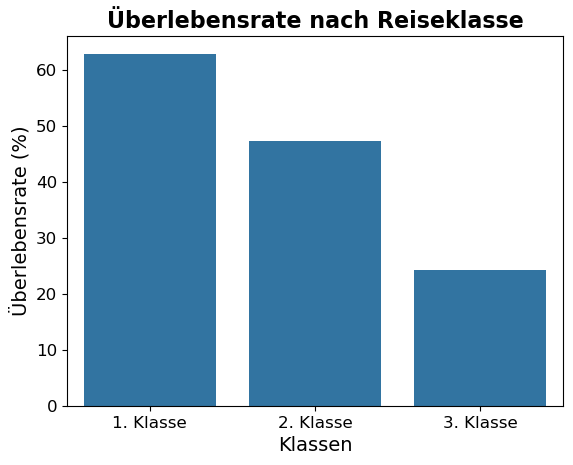

In [78]:
sns.barplot(df_pclass_survived)
plt.title("Überlebensrate nach Reiseklasse", fontsize=16, weight="bold")
plt.xlabel("Klassen", fontsize=14)
plt.ylabel("Überlebensrate (%)", fontsize=14)


plt.xticks(ticks=[0, 1, 2], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)


plt.yticks(fontsize=12)


plt.show()

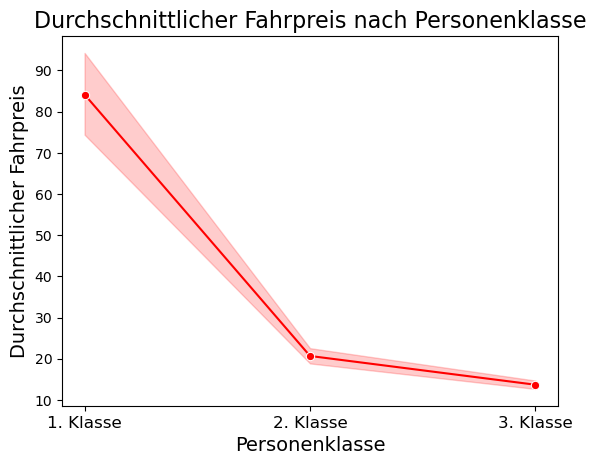

In [79]:

sns.lineplot(x="pclass", y="fare", data=df_titanic, color="red", marker="o")


plt.xticks(ticks=[1, 2, 3], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)


plt.xlabel("Personenklasse", fontsize=14)
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)
plt.title("Durchschnittlicher Fahrpreis nach Personenklasse", fontsize=16)


plt.show()

In [80]:
df_sex = df_titanic.groupby("sex").agg({"survived": "mean", "fare": "mean"}).reset_index()
df_sex["survived"] = df_sex["survived"] * 100
df_sex


,sex,survived,fare
0,female,74.203822,44.479818
1,male,18.890815,25.523893


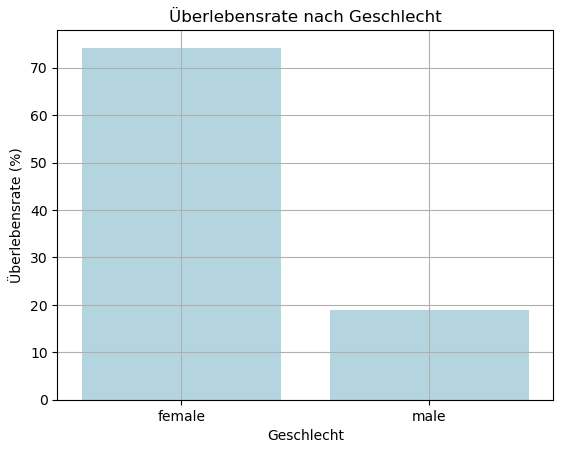

In [81]:
sns.barplot(x="sex", y="survived", data=df_sex, color="lightblue")
plt.xlabel("Geschlecht")
plt.ylabel("Überlebensrate (%)")
plt.title("Überlebensrate nach Geschlecht")
plt.grid(True)

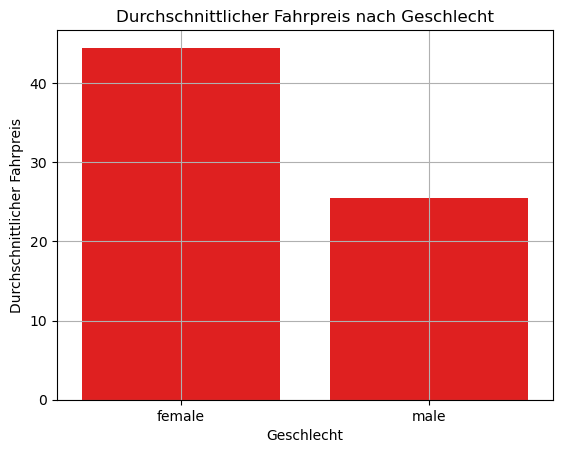

In [82]:
sns.barplot(x="sex", y="fare", data=df_sex, color="red")
plt.xlabel("Geschlecht")
plt.ylabel("Durchschnittlicher Fahrpreis")
plt.title("Durchschnittlicher Fahrpreis nach Geschlecht")
plt.grid(True)

In [83]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=bins, labels=labels)


df_age = df_titanic.groupby("age_group").agg({"survived": "mean", "fare": "mean"}).reset_index()


df_age.style.background_gradient(cmap='coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_94752\792257318.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df_titanic.groupby("age_group").agg({"survived": "mean", "fare": "mean"}).reset_index()


,age_group,survived,fare
0,0-10,0.593750,30.434439
1,10-20,0.382609,29.529531
2,20-30,0.365217,28.306719
3,30-40,0.445161,42.496100
4,40-50,0.383721,41.163181
5,50-60,0.404762,44.774802
6,60-70,0.235294,45.910782
7,70-80,0.200000,25.936680


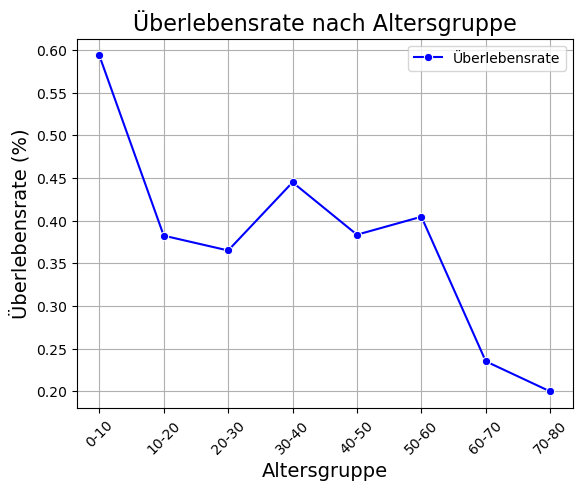

In [84]:
sns.lineplot(x="age_group", y="survived", data=df_age, color="blue", marker="o", label="Überlebensrate")
plt.xlabel("Altersgruppe", fontsize=14)
plt.ylabel("Überlebensrate (%)", fontsize=14)
plt.title("Überlebensrate nach Altersgruppe", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

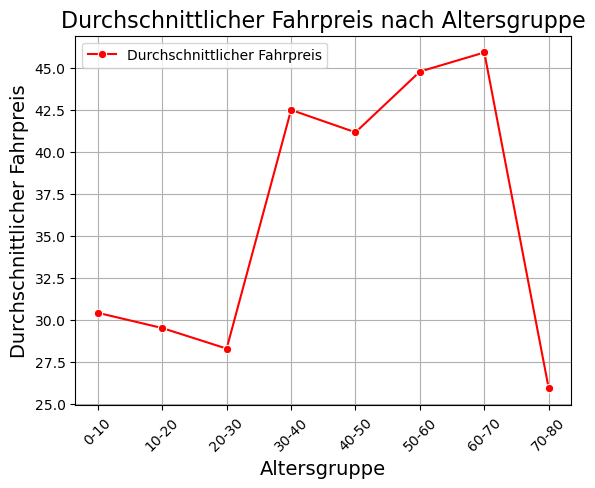

In [85]:
sns.lineplot(x="age_group", y="fare", data=df_age, color="red", marker="o", label="Durchschnittlicher Fahrpreis")
plt.xlabel("Altersgruppe", fontsize=14)
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)
plt.title("Durchschnittlicher Fahrpreis nach Altersgruppe", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [86]:
df_embarked = df_titanic.groupby("embark_town").agg({"survived": "mean", "fare": "mean"}).reset_index()


df_embarked.style.background_gradient(cmap='coolwarm')

,embark_town,survived,fare
0,Cherbourg,0.553571,59.954144
1,Queenstown,0.389610,13.276030
2,Southampton,0.336957,27.079812


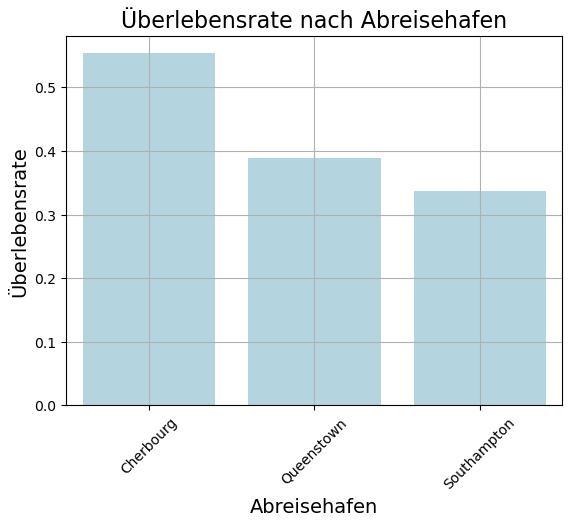

In [87]:
sns.barplot(x="embark_town", y="survived", data=df_embarked, color="lightblue")
plt.xlabel("Abreisehafen", fontsize=14)
plt.ylabel("Überlebensrate", fontsize=14)
plt.title("Überlebensrate nach Abreisehafen", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

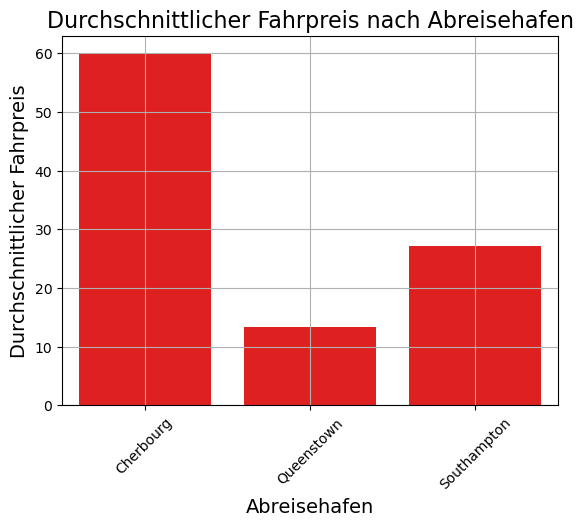

In [88]:
sns.barplot(x="embark_town", y="fare", data=df_embarked, color="red")
plt.xlabel("Abreisehafen", fontsize=14)
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)
plt.title("Durchschnittlicher Fahrpreis nach Abreisehafen", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [89]:
df_titanic["family_size"] = 1 + df_titanic["sibsp"] + df_titanic["parch"]
df_family_size = df_titanic.groupby("family_size").agg({"survived": "mean", "fare": "mean"}).reset_index()
df_family_size["survived"] = df_family_size["survived"] * 100
df_family_size



,family_size,survived,fare
0,1,30.353818,21.242689
1,2,55.279503,49.894129
2,3,57.843137,39.692482
3,4,72.413793,54.864510
4,5,20.000000,58.094453
5,6,13.636364,73.722727
6,7,33.333333,29.366667
7,8,0.000000,46.900000
8,11,0.000000,69.550000


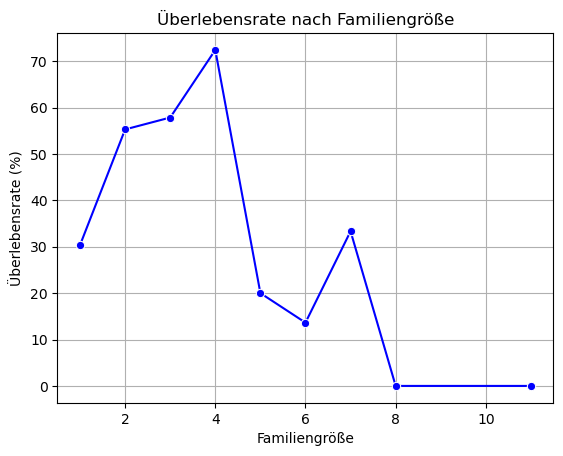

In [90]:
sns.lineplot(x="family_size", y="survived", data=df_family_size, color="blue", marker="o")
plt.xlabel("Familiengröße")
plt.ylabel("Überlebensrate (%)")
plt.title("Überlebensrate nach Familiengröße")
plt.grid(True)


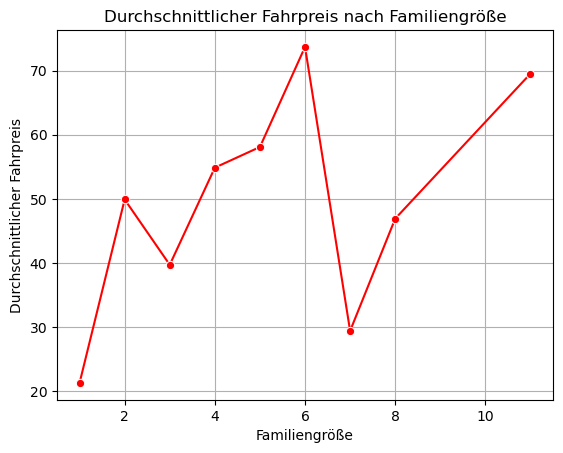

In [91]:
sns.lineplot(x="family_size", y="fare", data=df_family_size, color="red", marker="o")
plt.xlabel("Familiengröße")
plt.ylabel("Durchschnittlicher Fahrpreis")
plt.title("Durchschnittlicher Fahrpreis nach Familiengröße")
plt.grid(True)

In [93]:


def plot_titanic_analysis(variable):
    
    df_grouped = df_titanic.groupby(variable).agg({"survived": "mean", "fare": "mean"}).reset_index()
    df_grouped["survived"] = df_grouped["survived"] * 100  

    plt.figure(figsize=(14, 6))

   
    plt.subplot(1, 2, 1)
    sns.barplot(x=variable, y="survived", data=df_grouped, color="lightblue")
    plt.title(f"Überlebensrate nach {variable.capitalize()}")
    plt.xlabel(variable.capitalize())
    plt.ylabel("Überlebensrate (%)")

  
    plt.subplot(1, 2, 2)
    sns.barplot(x=variable, y="fare", data=df_grouped, color="red")
    plt.title(f"Durchschnittlicher Fahrpreis nach {variable.capitalize()}")
    plt.xlabel(variable.capitalize())
    plt.ylabel("Durchschnittlicher Fahrpreis")

    plt.tight_layout()
    plt.show()


interact(plot_titanic_analysis, variable=['pclass', 'sex', 'embarked', 'family_size', 'age_group']);



interactive(children=(Dropdown(description='variable', options=('pclass', 'sex', 'embarked', 'family_size', 'a…